In [9]:
!pip install bs4
!pip install yfinance

TSLA Statistical Data
                    Current 12/31/2023  9/30/2023  6/30/2023  3/31/2023  \
market_cap        [589.50B]  [789.90B]  [794.20B]  [830.86B]  [657.44B]   
enterprise_value  [569.98B]  [772.01B]  [776.93B]  [814.03B]  [641.00B]   
trailing_pe         [43.05]    [80.15]    [71.29]    [76.99]    [57.31]   
forward_pe          [56.50]    [70.92]    [55.25]    [76.34]    [54.05]   
PEG_ratio            [2.06]     [2.91]     [2.13]     [2.89]     [1.89]   
price_sales          [6.67]     [9.02]     [9.25]    [10.57]     [8.85]   
price_book           [9.41]    [14.80]    [15.56]    [17.29]    [14.71]   
ev_revenue           [5.89]    [30.68]    [33.27]    [32.66]    [27.48]   

                 12/31/2022  
market_cap        [388.97B]  
enterprise_value  [373.74B]  
trailing_pe         [38.10]  
forward_pe          [24.27]  
PEG_ratio            [1.08]  
price_sales          [5.68]  
price_book           [9.78]  
ev_revenue          [15.37]  
TSLA Current Revenue: 96.77B
GME

<AxesSubplot:title={'center':'GME Volume'}, xlabel='Date'>

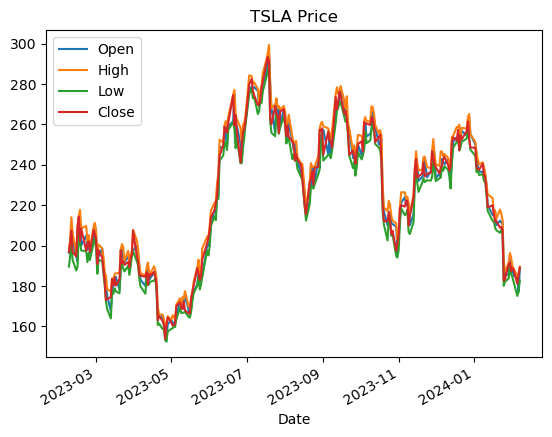

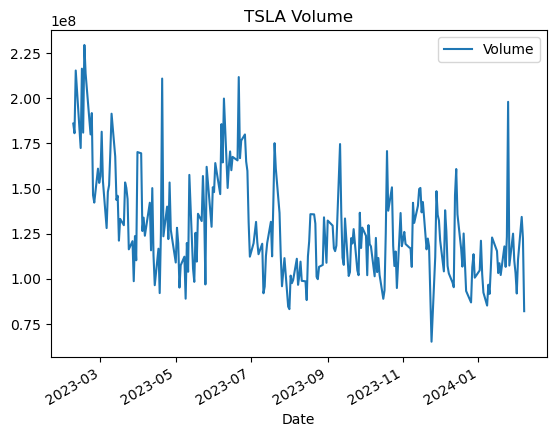

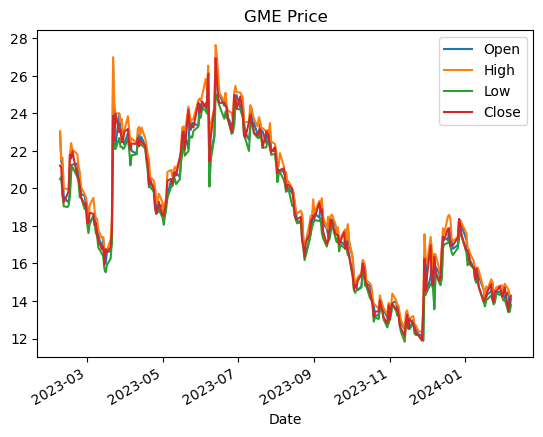

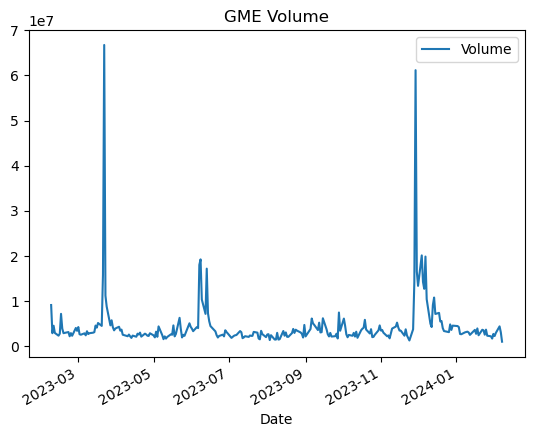

In [15]:
import requests
import yfinance as yf
import json
import datetime
import random
import pandas
from bs4 import BeautifulSoup
from collections import OrderedDict

###################################################################Extracting Tesla Stock Data Using yfinance - 2 Points
tsla = yf.Ticker('TSLA')
tsla_data = tsla.history(period="1y")

###################################################################Extracting Tesla Revenue Data Using Webscraping - 1 Points
print('TSLA Statistical Data')
x = 0
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0'
}

r = requests.get('https://finance.yahoo.com/quote/TSLA/key-statistics?p=TSLA',headers=headers)
soup = BeautifulSoup(r.text,'html.parser')
qs = list(soup.find_all('td'))
dates = list(soup.find_all('th'))
dates_used = []
for dp in dates:
    dp = str(dp)
    if '<span>' in dp:
        dp = dp.split('<span>')[1]
        dp = dp.split('</span>')[0]
        dates_used.append(dp)
    x+=1

market_cap=[qs[1],qs[2],qs[3],qs[4],qs[5],qs[6]]
enterprise_value = [qs[8],qs[9],qs[10],qs[11],qs[12],qs[13]]
trailing_pe = [qs[15],qs[16],qs[17],qs[18],qs[19],qs[20]]
forward_pe = [qs[22],qs[23],qs[24],qs[25],qs[26],qs[27]]
PEG_ratio = [qs[29],qs[30],qs[31],qs[32],qs[33],qs[34]]
price_sales = [qs[36],qs[37],qs[38],qs[39],qs[40],qs[41]]
price_book = [qs[43],qs[44],qs[45],qs[46],qs[47],qs[48]]
ev_revenue = [qs[50],qs[51],qs[52],qs[53],qs[54],qs[55]]
revenue=str(qs[134]).split('>')[1]
revenue= revenue.replace('</td','')

df_list = [market_cap,enterprise_value,trailing_pe,forward_pe,PEG_ratio,
           price_sales,price_book,ev_revenue]
df_list_labels = ['market_cap','enterprise_value','trailing_pe',
                  'forward_pe','PEG_ratio',
           'price_sales','price_book','ev_revenue']

df = pandas.DataFrame(df_list,columns=dates_used)
for i in range(len(df_list)):
    df = df.rename(index={i: df_list_labels[i]})
print(df)
print('TSLA Current Revenue:', revenue)

###################################################################Extracting GameStop Stock Data Using yfinance - 2 Points
gme = yf.Ticker('GME')
gme_data = gme.history(period="1y")

###################################################################Extracting GameStop Revenue Data Using Webscraping - 1 Points
print('GME Statistical Data')
x = 0
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; rv:91.0) Gecko/20100101 Firefox/91.0'
}

r = requests.get('https://finance.yahoo.com/quote/GME/key-statistics?p=GME',headers=headers)
soup = BeautifulSoup(r.text,'html.parser')
qs = list(soup.find_all('td'))
dates = list(soup.find_all('th'))
dates_used = []
for dp in dates:
    dp = str(dp)
    if '<span>' in dp:
        dp = dp.split('<span>')[1]
        dp = dp.split('</span>')[0]
        dates_used.append(dp)
    x+=1
x=0
market_cap=[qs[1],qs[2],qs[3],qs[4],qs[5]]
enterprise_value = [qs[7],qs[8],qs[9],qs[10],qs[11]]
trailing_pe = [qs[13],qs[14],qs[15],qs[16],qs[17]]
forward_pe = [qs[19],qs[20],qs[21],qs[22],qs[23]]
PEG_ratio = [qs[25],qs[26],qs[27],qs[28],qs[29]]
price_sales = [qs[31],qs[32],qs[33],qs[34],qs[35]]
price_book = [qs[37],qs[38],qs[39],qs[40],qs[41]]
ev_revenue = [qs[43],qs[44],qs[45],qs[46],qs[47]]
revenue=str(qs[125]).split('>')[1]
revenue= revenue.replace('</td','')

df_list = [market_cap,enterprise_value,trailing_pe,forward_pe,PEG_ratio,
           price_sales,price_book,ev_revenue]
df_list_labels = ['market_cap','enterprise_value','trailing_pe',
                  'forward_pe','PEG_ratio',
           'price_sales','price_book','ev_revenue']

df = pandas.DataFrame(df_list,columns=dates_used)
for i in range(len(df_list)):
    df = df.rename(index={i: df_list_labels[i]})
print(df)
print('GME Current Revenue:' , revenue)

###################################################################Tesla Stock and Revenue Dashboard - 2 Points
tsla_data.plot.line(title='TSLA Price',y=['Open','High','Low','Close'])
tsla_data.plot.line(title='TSLA Volume',y='Volume')

###################################################################GameStop Stock and Revenue Dashboard- 2 Points
gme_data.plot.line(title='GME Price',y=['Open','High','Low','Close'])
gme_data.plot.line(title='GME Volume',y='Volume')

###################################################################Sharing your Assignment Notebook - 2 Points
###################################################################Done


